In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [31]:
xls = pd.ExcelFile(r'D:\Du An\Data FLow\v1\data\FORECASTING BUSINESS PERFORMANCE.xlsx')
xls.sheet_names

['SalesFact', 'Geography', 'Product']

In [32]:
sales_df = pd.read_excel(xls, 'SalesFact')
geo_df = pd.read_excel(xls, 'Geography')
product_df = pd.read_excel(xls, 'Product')
sales_df.head(), geo_df.head(), product_df.head()

(   ProductID       Date    Zip  Units    Revenue          COGS
 0       1228 2013-07-31  78773     12   19648.44  12309.747660
 1        781 2014-03-12  90501     16   20351.52  13497.128064
 2       2090 2013-11-29  44460     26  111367.62  91488.499830
 3       1116 2018-08-29  30122     12   36280.44  21967.806420
 4        993 2013-04-27  75789     14   55557.18  48645.866808,
      Zip            City State Region      District
 0  15201  Pittsburgh, PA    PA   East  District #13
 1  15202  Pittsburgh, PA    PA   East  District #13
 2  15203  Pittsburgh, PA    PA   East  District #13
 3  15204  Pittsburgh, PA    PA   East  District #13
 4  15205  Pittsburgh, PA    PA   East  District #13,
   Category      Segment        Product  ProductID
 0    Urban  Convenience  Maximus UC-01        536
 1    Urban  Convenience  Maximus UC-02        537
 2    Urban  Convenience  Maximus UC-03        538
 3    Urban  Convenience  Maximus UC-04        539
 4    Urban  Convenience  Maximus UC-05  

In [33]:
sales_sample = pd.read_excel(xls, 'SalesFact', nrows=5)
geo_sample = pd.read_excel(xls, 'Geography', nrows=5)
product_sample = pd.read_excel(xls, 'Product', nrows=5)
sales_sample, geo_sample, product_sample

(   ProductID       Date    Zip  Units    Revenue          COGS
 0       1228 2013-07-31  78773     12   19648.44  12309.747660
 1        781 2014-03-12  90501     16   20351.52  13497.128064
 2       2090 2013-11-29  44460     26  111367.62  91488.499830
 3       1116 2018-08-29  30122     12   36280.44  21967.806420
 4        993 2013-04-27  75789     14   55557.18  48645.866808,
      Zip            City State Region      District
 0  15201  Pittsburgh, PA    PA   East  District #13
 1  15202  Pittsburgh, PA    PA   East  District #13
 2  15203  Pittsburgh, PA    PA   East  District #13
 3  15204  Pittsburgh, PA    PA   East  District #13
 4  15205  Pittsburgh, PA    PA   East  District #13,
   Category      Segment        Product  ProductID
 0    Urban  Convenience  Maximus UC-01        536
 1    Urban  Convenience  Maximus UC-02        537
 2    Urban  Convenience  Maximus UC-03        538
 3    Urban  Convenience  Maximus UC-04        539
 4    Urban  Convenience  Maximus UC-05  

In [34]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.set_index('Date', inplace=True)

In [35]:
sales_monthly = sales_df.resample('M').sum()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20832\2177036723.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_monthly = sales_df.resample('M').sum()


In [36]:
sales_monthly = sales_df.resample('M').sum()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20832\2177036723.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_monthly = sales_df.resample('M').sum()


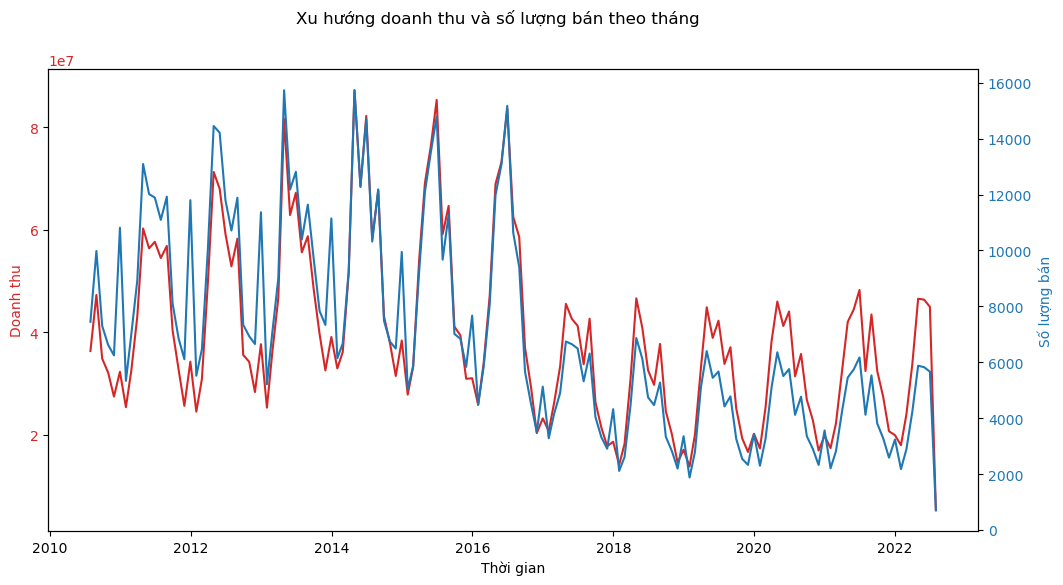

In [37]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Thời gian')
ax1.set_ylabel('Doanh thu', color='tab:red')
ax1.plot(sales_monthly.index, sales_monthly['Revenue'], color='tab:red', label='Doanh thu')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Số lượng bán', color='tab:blue')
ax2.plot(sales_monthly.index, sales_monthly['Units'], color='tab:blue', label='Số lượng bán')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.suptitle('Xu hướng doanh thu và số lượng bán theo tháng')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20832\2884160498.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sales_yearly = sales_df.resample('Y').sum()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20832\2884160498.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  sales_quarterly = sales_df.resample('Q').sum()


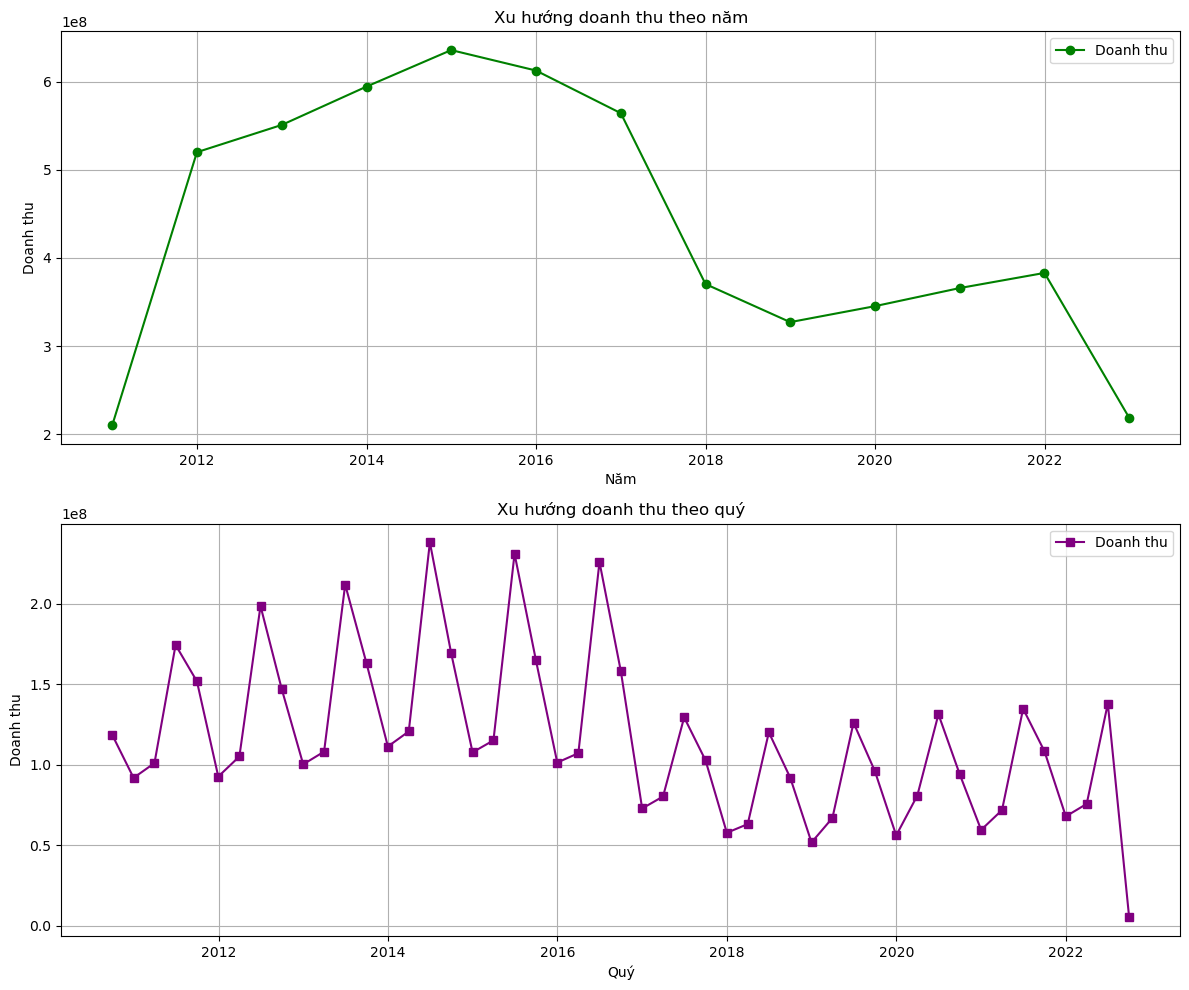

In [38]:
sales_yearly = sales_df.resample('Y').sum()
sales_quarterly = sales_df.resample('Q').sum()

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].plot(sales_yearly.index, sales_yearly['Revenue'], marker='o', linestyle='-', color='green', label='Doanh thu')
axes[0].set_title('Xu hướng doanh thu theo năm')
axes[0].set_xlabel('Năm')
axes[0].set_ylabel('Doanh thu')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(sales_quarterly.index, sales_quarterly['Revenue'], marker='s', linestyle='-', color='purple', label='Doanh thu')
axes[1].set_title('Xu hướng doanh thu theo quý')
axes[1].set_xlabel('Quý')
axes[1].set_ylabel('Doanh thu')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


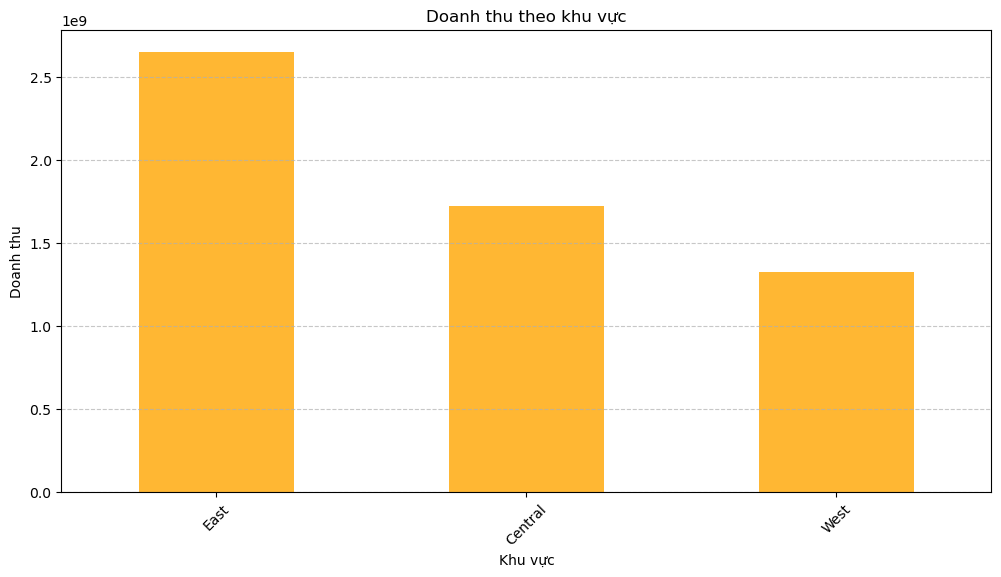

In [39]:
sales_geo_df = sales_df.merge(geo_df, on='Zip', how='left')

revenue_by_region = sales_geo_df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
revenue_by_region.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Doanh thu theo khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Doanh thu')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


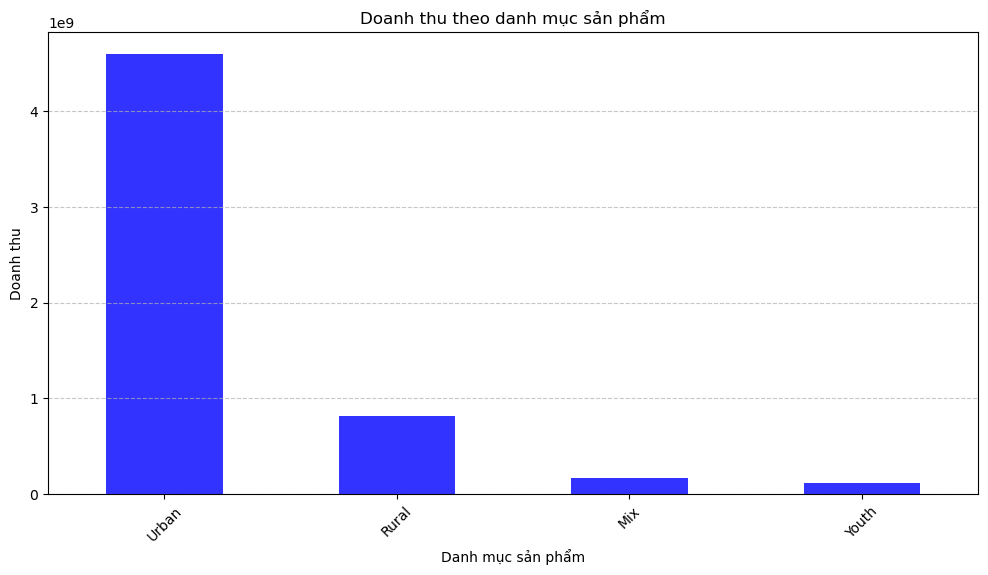

In [40]:
# Gộp dữ liệu SalesFact với Product để phân tích theo dòng sản phẩm
sales_product_df = sales_df.merge(product_df, on='ProductID', how='left')

# Tổng hợp doanh thu theo danh mục sản phẩm (Category)
revenue_by_category = sales_product_df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

# Vẽ biểu đồ doanh thu theo danh mục sản phẩm
plt.figure(figsize=(12, 6))
revenue_by_category.plot(kind='bar', color='blue', alpha=0.8)
plt.title('Doanh thu theo danh mục sản phẩm')
plt.xlabel('Danh mục sản phẩm')
plt.ylabel('Doanh thu')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
